In [ ]:
# 📌 Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [8]:
# 📌 Load the dataset
df = pd.read_csv("../data/cleaned_data.csv")  # Ensure correct path

In [9]:
# 📌 Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# 🔹 Fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
# 🔹 Verify column names (to avoid KeyError)
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [14]:
# Ensure the target column exists
target_column = "target"  # Change from "HeartDisease" to "target"

if target_column not in df.columns:
    raise KeyError(f"Column '{target_column}' not found. Available columns: {df.columns}")

# Separate features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]


In [15]:

# 📌 Encode categorical variables
X = pd.get_dummies(X)  # Converts categorical variables to numerical

In [16]:
# 📌 Scale numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# 📌 Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# 📌 Train the Decision Tree model
model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [19]:
# 📌 Model evaluation
y_pred = model.predict(X_test)

In [20]:
# 🔹 Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7705


In [21]:
# 🔹 Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.87      0.73      0.79        37

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



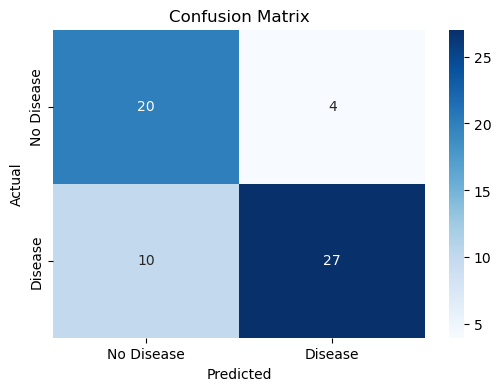

In [22]:
# 🔹 Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
# 📌 Save the trained model
joblib.dump(model, "../ml_model/heart_disease_model.pkl")
print("Model saved successfully! 🚀")


Model saved successfully! 🚀
